In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import math

## 1. 기초 통계의 대표값
* 평균(mean)
* 중앙값(median)
* 최빈값(mode)

### (1) 평균(mean) $ \mu $
* 모든 값의 총합을 값의 개수로 나눈 값
* 극단적인 값(이상값/아웃라이어)이 있는 경우 평균에 영향을 미침
* 모집단의 평균 $ \mu $
* 표본집단의 평균 $ \bar {x} $
* $$ 모평균 : \mu = {\sum_{i=1}^N x_i \over N} $$
* $$ 표본평균 : \bar {x} = {\sum_{i=1}^N x_i \over n} $$

In [2]:
a = pd.DataFrame([2,3,4,5,3,5,6,7,8,10], columns=['표본'])
a

,표본
0,2
1,3
2,4
3,5
4,3
5,5
6,6
7,7
8,8
9,10


In [3]:
a.mean()

표본    5.3
dtype: float64

### (2) 중앙값(median)
* 모든 데이터를 큰 순서대로 나열할 때 가운데 있는 값
* 데이터의 개수가 홀수일 때는 정중앙의 값
* 데이터의 개수가 짝수일 때는 정중앙 2개의 수의 평균값
* 이상치가 있어도 영향을 받지 않음

In [4]:
a.T

,0,1,2,3,4,5,6,7,8,9
표본,2,3,4,5,3,5,6,7,8,10


In [5]:
a.median()

표본    5.0
dtype: float64

### (3) 최빈값(mode)
* 표본에서 가장 많이 등장하는 값
* 최빈값도 극단값에 영향을 받지 않음

In [6]:
a.T

,0,1,2,3,4,5,6,7,8,9
표본,2,3,4,5,3,5,6,7,8,10


In [7]:
a.mode()

,표본
0,3
1,5


### (4) 산술평균/기하평균
* 산술평균(덧셈의 평균) : 모든 데이터의 합계 / 데이터 수
* 기하평균(곱셈의 평균) : 모든 데이터의 곱의 n제곱근 - 증가율의 평균을 계산할 때 사용

In [8]:
a.T

,0,1,2,3,4,5,6,7,8,9
표본,2,3,4,5,3,5,6,7,8,10


In [9]:
# 산술평균
a.mean()

표본    5.3
dtype: float64

In [10]:
# 기하평균
from scipy.stats import gmean
geometric_mean = gmean(a['표본'])
geometric_mean

np.float64(4.766078358486367)

* 2020년에 7%, 2021년에 35%, 2022년에 40%, 2023년에 69%의 매출 증가가 있었다면 4년간 평균 매출 증가율은?

In [11]:
print('산술평균 :', pd.Series([7,35,40,69]).mean())
print('기하평균 :', gmean([7,35,40,69]))

산술평균 : 37.75
기하평균 : 28.67601451933219


## 2. 도수 분포표와 히스토그램
### (1) 도수분포표(histogram 그래프)
* 주어진 데이터를 일정한 범위로 나누고 그 범위에 출현하는 데이터 개수를 조사해 나타낸 표
* 데이터의 구간 폭을 '계급(class)'
* 각 계급에 속하는 데이터의 개수 '도수'
* 각 계급의 중앙값을 '계급값'
* 도수분포표에서 도수가 큰 것을 '출현 횟수가 많다'고 하고
* 가장 도수가 큰 계급의 계급값을 '최빈값'이라고 함

In [12]:
data = pd.read_csv('https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv')
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [13]:
age = data[['Age']]
age

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [14]:
# value_counts로 도수분포표 만들기
age.value_counts()

Age 
24.0    30
22.0    27
18.0    26
19.0    25
30.0    25
        ..
53.0     1
66.0     1
70.5     1
74.0     1
80.0     1
Name: count, Length: 88, dtype: int64

In [15]:
# 계급 구간을 10단위로 계급을 나누어 도수분포표를 만들고
# 도수분포표(Frequency Distribution Table)를 시각화한 히스토그램 그래프 그리기
bins = (0, 10, 20, 30, 40, 50, 60, 70, 80, 90)
labels = ('under10s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s')
age_FDT = pd.cut(age['Age'].values, bins=bins, labels=labels, right=False)
print(age_FDT.value_counts())

under10s     62
10s         102
20s         220
30s         167
40s          89
50s          48
60s          19
70s           6
80s           1
Name: count, dtype: int64


<Axes: >

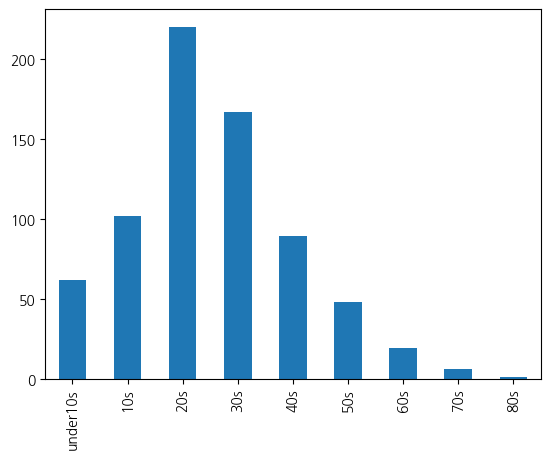

In [16]:
age_FDT.value_counts().plot(kind='bar')

### (2) 상대도수분포표(Relative Frequency Distribution Table)
* 상대도수 : 계급의 도수 / 전체 도수의 합계, 어떤 계급의 도수가 전체 도수에서 몇 %를 차지하는지 나타내는 값
* 상대도수분포표 : 모든 계급의 상대도수를 구해서 더한 것

In [17]:
fdt_df = pd.DataFrame(age_FDT.value_counts())
fdt_df

,count
under10s,62
10s,102
20s,220
30s,167
40s,89
50s,48
60s,19
70s,6
80s,1


In [18]:
# 상대도수분포표 만들기
# 상대도수 : 계급의 도수 / 전체 도수의 합계

In [19]:
fdt_df['rfdt'] = (fdt_df['count'] / fdt_df['count'].sum()).round(3) * 100
fdt_df

,count,rfdt
under10s,62,8.7
10s,102,14.3
20s,220,30.8
30s,167,23.4
40s,89,12.5
50s,48,6.7
60s,19,2.7
70s,6,0.8
80s,1,0.1


### 구간화가 필요한 데이터에서 계급의 개수는 몇 개로?
* 스터지스 공식 : 도수분포표나 히스토그램을 만들 때 계급의 수가 적당한지 판단하는 공식
* 전체 데이터 개수를 $ 2^n $이라 하고, 그때 계급 수를 n+1로 함

In [20]:
round(math.log2(len(age))) + 1

11

### 3) 편차(deviation)
* 데이터와 평균이 떨어진 거리, 데이터와 평균값과의 차이
* 데이터 - 평균값

In [21]:
a['평균'] = a['표본'].mean()

In [22]:
a['편차'] = a['표본'] - a['평균']

In [23]:
a

,표본,평균,편차
0,2,5.3,-3.3
1,3,5.3,-2.3
2,4,5.3,-1.3
3,5,5.3,-0.3
4,3,5.3,-2.3
5,5,5.3,-0.3
6,6,5.3,0.7
7,7,5.3,1.7
8,8,5.3,2.7
9,10,5.3,4.7


In [24]:
# 전체 데이터의 편차의 합
a['편차'].sum()

np.float64(1.7763568394002505e-15)

## 4) 분산 (variance)
* 편차 제곱의 합 / 데이터 수
* 평균으로부터 떨어진 정도가 잘 보일 수 있도록 고안된 지표
* 편차의 합은 양수와 음수가 합쳐져서 0이 되기 때문에 각 데이터가 평균으로부터 얼마나 떨어져 있는지 알 수 없어서 편차 제곱의 합인 분산을 사용함
* 모분산 : $ \sigma^2 $
$$ \sigma^2 = {\sum(x_i-\mu)^2 \over N} $$
* 표본분산 : $ s^2 $
$$ s^2 = {\sum(x_i-\bar{x})^2 \over n-1} $$

In [25]:
a['편차제곱'] = a['편차']**2
a['모분산'] = a['편차제곱'].sum() / len(a['편차제곱'])
a

,표본,평균,편차,편차제곱,모분산
0,2,5.3,-3.3,10.89,5.61
1,3,5.3,-2.3,5.29,5.61
2,4,5.3,-1.3,1.69,5.61
3,5,5.3,-0.3,0.09,5.61
4,3,5.3,-2.3,5.29,5.61
5,5,5.3,-0.3,0.09,5.61
6,6,5.3,0.7,0.49,5.61
7,7,5.3,1.7,2.89,5.61
8,8,5.3,2.7,7.29,5.61
9,10,5.3,4.7,22.09,5.61


In [26]:
# 표본분산
a['표본'].var()

np.float64(6.233333333333333)

### 5) 표준편차 Standard Diviation
* 분산의 제곱근
* 분산은 평균으로부터의 차를 알기 쉽지만 2가지 문제가 있음
* 단위가 본래 단위의 제곱이 되면서 값이 너무 커지게 됨
* 표준편차는 제곱으로 커진 값에 루트를 씌워 다시 원래 단위로 돌려 놓은 지표
* 모집단의 표준편차 $ \sigma $
* $ \sigma = \sqrt{\sum(x_i-\mu)^2 \over N} $ <br>
* 표본집단의 표준편차 $ s $ <br>
* $ s = \sqrt{\sum(x_i-\bar{x})^2 \over n-1} $ <br>

In [27]:
a['표준편차'] = a['모분산'].apply(math.sqrt)
a

,표본,평균,편차,편차제곱,모분산,표준편차
0,2,5.3,-3.3,10.89,5.61,2.368544
1,3,5.3,-2.3,5.29,5.61,2.368544
2,4,5.3,-1.3,1.69,5.61,2.368544
3,5,5.3,-0.3,0.09,5.61,2.368544
4,3,5.3,-2.3,5.29,5.61,2.368544
5,5,5.3,-0.3,0.09,5.61,2.368544
6,6,5.3,0.7,0.49,5.61,2.368544
7,7,5.3,1.7,2.89,5.61,2.368544
8,8,5.3,2.7,7.29,5.61,2.368544
9,10,5.3,4.7,22.09,5.61,2.368544


In [29]:
a['표본'].std()

np.float64(2.496664441476534)

In [31]:
a['표본'].describe()

count    10.000000
mean      5.300000
std       2.496664
min       2.000000
25%       3.250000
50%       5.000000
75%       6.750000
max      10.000000
Name: 표본, dtype: float64

## 표본 분산과 표본표준편차에서 n-1을 분모로 사용하는 이유
* 표본평균을 유지하기 위해서
* 자유도(degrees of freedom)

### 6) 표준점수 Standard Score / Z-점수 z-score
* 데이터 포인트(값)가 평균으로부터 얼마나 떨어져 있는지를 나타내는 지표
* 이는 데이터 포인트가 평균에서 몇 표준편차 떨어져 있는지를 나타내며
* 데이터의 상대적인 위치를 이해하는데 유용함
* 모집단의 표준점수(z-score)
* $ Z = {x_i-\mu \over \sigma} $<br>
* 표본집단의 표준점수(z-score)
* $ Z = {x_i-\bar{x} \over s} $<br>

## 가설 검정 t-test
* t-test는 두 집단의 평균을 비교해서 차이가 있는지 확인하는 통계적 방법
* t 통계량의 절대값이 크면 p-value(유의수준)가 낮아짐

### 1) 일 표본 단측 t-검정 (한쪽으로 방향성을 갖는 경우)
* 모수에 대한 검정을 할 때 모수 값이 **~보다 크다, ~보다 작다**와 같이 한쪽으로 방향성을 갖는 경우 수행되는 검정 방법
* 00공장에서 생산되는 지우개의 평균 중량은 50g 이하다(귀무가설 - 원래 알고 있던 사실)
* 00공장에서 생산되는 지우개의 평균 중량은 50g 초과다(대립가설 - 새로운 주장)

In [ ]:
# 통계와 회귀분석에 특화되어 있는 라이브러리
# conda install statsmodels

In [33]:
import statsmodels.stats.weightstats as stests
from scipy import stats

In [34]:
# 일 표본 단측 t-test를 위해서 지우개 10개의 표본 추출
weights = np.random.uniform(49, 52, 10)
print(weights)
print('지우개의 평균 ', weights.mean())

[49.1223932  49.55102792 49.54371917 49.55610275 51.38478132 50.56117122
 51.4013202  50.49588495 49.24956111 51.24396285]
지우개의 평균  50.21099246879528


In [36]:
# 일 표본 단측 t-test 크다 / 작다
t_stat, p_value = stats.ttest_1samp(weights, 50, alternative='greater')
print(f't-통계량 : {t_stat}, p-value : {p_value}')

t-통계량 : 0.731652703388799, p-value : 0.24149768591449255


* p-value가 0.241이므로 유의수준 0.05보다 크기 때문에
* 귀무가설(지우개의 무게는 50g 이하다)은 채택
* 대립가설(지우개의 무게는 50g 초과다)은 기각

### 2) 일 표본 양측 t-test
* 방향성이 없는 경우, 맞다/아니다 결정
* 단측 검정과 달리 모수 값이 **~이다, ~가 아니다**와 같이 방향성이 없는 경우
* 대한민국 남성의 평균 몸무게는 70kg이다 (귀무가설)
* 대한민국 남성의 평균 몸무게는 70kg이 아니다 (대립가설)

In [37]:
# 일 표본 양측 t-test를 위한 40kg~100kg 사이 남성 100명 표본 추출
weights = np.random.uniform(40,100,100)
print(len(weights))
print(weights.mean())

100
72.08503416395708


In [38]:
# 일 표본 양측 t-test
t_stat, p_value = stats.ttest_1samp(weights, 70, alternative='two-sided')
print(f't-통계량 : {t_stat}, p-value : {p_value}')

t-통계량 : 1.2131905928740194, p-value : 0.22794368728559716


* p-value가 0.2279이므로 유의수준 0.05보다 크기 때문에
* 귀무가설(대한민국 남성의 평균 몸무게는 70kg이다)은 채택
* 대립가설(대한민국 남성의 평균 몸무게는 70kg이 아니다)은 기각

### 3) 이 표본 단측 t 검정
* ~보다 크다 / 작다 (방향성이 있는 경우)
* 두 집단에 대해서 모수 비교를 할 때 A가 B보다 크다/작다를 비교하는 검정
* A회사의 급여가 B회사의 급여보다 같거나 많음

### 4) 이 표본 양측 t 검정
* A와 B가 같다/다르다
* 두 집단에 대해서 모수 비교를 할 때 A가 B보다 같다/다르다를 비교하는 검정
* A회사의 급여가 B회사의 급여보다 같다/다르다

## 5) 대응 표본 t 검정 (paired t-test) - A/B test
* 실험 전후 비교
* 동일한 대상에 대해서 두가지 관측치가 있는 경우 이를 비교하여 차이가 있는지 검정할 때 사용
* 두 집단에 신약 투여 후 전후 수치 비교, 새로운 버전의 앱/기능 추가 전후 비교
* 새로운 운동법이 체중 감량 효과가 있는지 검증하기 위해서 새로운 운동법을 실시한 집단과 실시하지 않은 집단의 체중 비교
* 새로운 운동법으로 체중감량의 효과는 없다 (귀무가설) → 운동 전 무게와 운동 후 무게 차이 >= 0
* 새로운 운동법으로 체중감량의 효과가 있다 (대립가설) → 운동 전 무게와 운동 후 무게 < 0

In [40]:
# 대응 표본 t검정을 위한 표본 추출
before = np.random.uniform(60,80,100)
after = before + np.random.normal(-3,2,100)

# 대응 표본 t검정
t_stat, p_value = stats.ttest_rel(before, after, alternative='greater')
print(f't-통계량 : {t_stat}, p-value : {p_value}')

t-통계량 : 13.124456257144342, p-value : 1.072000581514779e-23


* p-value가 0.05보다 작으므로 귀무가설이 기각/대립가설이 채택

## 분산분석 (ANOVA)
* 3개 이상의 모집단 있을 경우 집단 사이의 평균 비교
* 분산분석의 귀무가설($H_0$) : "모든 집단 간 평균은 같다"
1) 분산 분석을 수행하기 위해서는 3가지 가정이 필요
    * 정규성 : 각 집단의 표본들은 정규분포를 따라야 함
    * 등분산성 : 각 집단은 동일한 분산을 가져야 함
    * 독립성 : 각 집단은 서로에게 영향을 주지 않음
2) 분산 분석
    * 분산분석의 독립변수는 범주형 데이터, 종속변수는 연속형 데이터이어야 함
    * 분산분석에는 '(집단 간 분산)/(집단 내 분산)'으로 계산되는 F-value를 사용
    * F-value가 커지면 p-value가 작아짐
    * 평균을 비교하는 분석에 '분산'의 개념을 사용하는 이유는 집단 간 평균의 분산이 클수록 각 집단의 평균은 서로 멀리 떨어져 있기 때문에 집단 간 차이를 비교하기 쉬워짐

### 1) 일원분산분석(one-way ANOVA)
* 셋 이상의 집단 간 평균을 비교하는 상황에서 하나의 집단에 속하는 독립변수와 종속변수가 모두 한 개일 때 사용
    * 독립변수 1 : 연령별 집단 (청소년, 성인, 노인) - 범주형
    * 종속변수 1 : 유튜브 시청 시간 - 연속형<br>
<br>
* 신형 휴대폰 A, B, C의 속도 차이가 있는지 여부
* 귀무가설($H_0$) : A, B, C 세 대의 신형 휴대폰 간의 속도 차이는 없음
* 대립가설($H_1$) : A, B, C 세 대의 신형 휴대폰 간의 속도 차이는 있음

In [41]:
# 분산분석을 위한 데이터 생성
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [43]:
np.random.seed(0)
phone_speed = np.random.uniform(75,100,45)
telecom = np.tile(['A','B','C'], 15)
print('phone_speed\n', phone_speed)
print('telecome\n', telecom)

phone_speed
 [88.7203376  92.87973416 90.0690844  88.62207957 85.59136998 91.14735283
 85.93968028 97.29432502 99.09156901 84.58603797 94.79312595 88.22237299
 89.20111403 98.13991596 76.77590145 77.17823249 75.50545994 95.81549614
 94.45391877 96.75030371 99.46545856 94.97896411 86.53698406 94.51322941
 77.95686065 90.99802553 78.58383219 98.61672293 88.04620804 85.3665485
 81.6138903  94.35584224 86.40375831 89.21084872 75.46974501 90.44088743
 90.30239307 90.42334992 98.59370196 92.04550748 83.98769751 85.92579884
 92.4407799  76.50563679 91.66916789]
telecome
 ['A' 'B' 'C' 'A' 'B' 'C' 'A' 'B' 'C' 'A' 'B' 'C' 'A' 'B' 'C' 'A' 'B' 'C'
 'A' 'B' 'C' 'A' 'B' 'C' 'A' 'B' 'C' 'A' 'B' 'C' 'A' 'B' 'C' 'A' 'B' 'C'
 'A' 'B' 'C' 'A' 'B' 'C' 'A' 'B' 'C']


In [44]:
phone_data = pd.DataFrame(dict(telecom=telecom, phone_speed=phone_speed))
phone_data

,telecom,phone_speed
0,A,88.720338
1,B,92.879734
2,C,90.069084
3,A,88.622080
4,B,85.591370
5,C,91.147353
6,A,85.939680
7,B,97.294325
8,C,99.091569
9,A,84.586038


In [45]:
# 분산분석 수행
# 선형회귀분석
model = ols('phone_speed ~ C(telecom)', data=phone_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            phone_speed   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.033
Method:                 Least Squares   F-statistic:                    0.2983
Date:                Wed, 07 May 2025   Prob (F-statistic):              0.744
Time:                        13:34:54   Log-Likelihood:                -149.68
No. Observations:                  45   AIC:                             305.4
Df Residuals:                      42   BIC:                             310.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          88.3912      1.800     

In [46]:
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                 sum_sq    df       F    PR(>F)
C(telecom)    28.992635   2.0  0.2983  0.743638
Residual    2041.048907  42.0     NaN       NaN


* 귀무가설($H_0$) : A, B, C 세 대의 신형 휴대폰 간의 속도 차이는 없음 (>0.05)
* 대립가설($H_1$) : A, B, C 세 대의 신형 휴대폰 간의 속도 차이는 있음 (<0.05)
* p-value가 0.74로 0.05보다 크므로 귀무가설 채택